해당 과제는 'Brightics Studio'로 시작하는 금융 빅데이터 분석 교재를 참고함

## 전처리 후 - Feature Selection

In [1]:
import pandas as pd 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

# 3. PCA

정규화 + 스케일링 + PCA

In [3]:
df = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/data/Scaled_data.csv',encoding='cp949')

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df_m=df

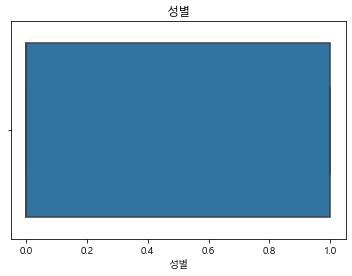

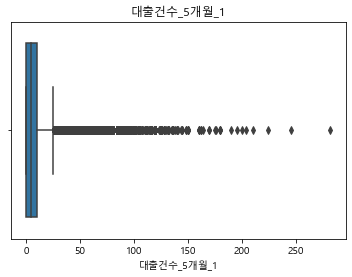

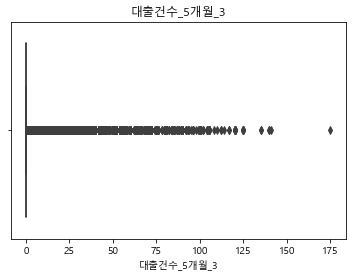

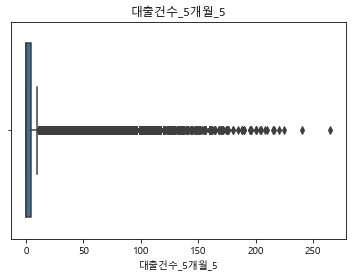

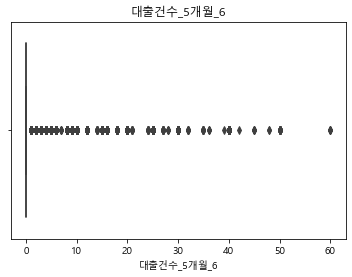

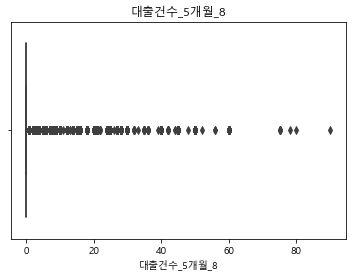

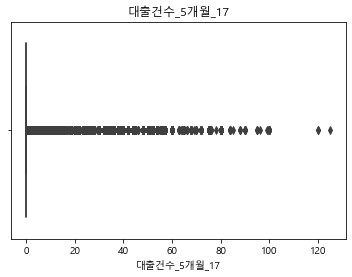

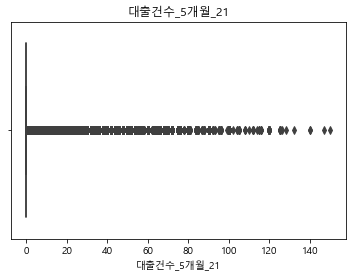

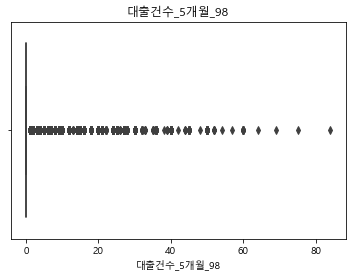

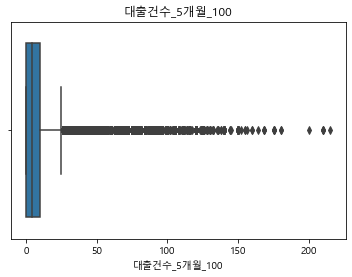

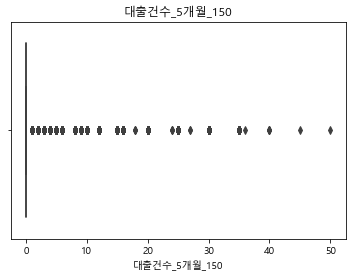

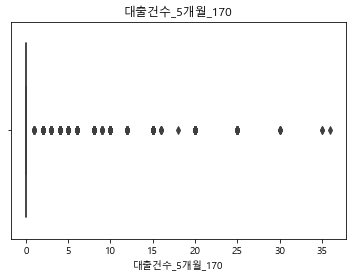

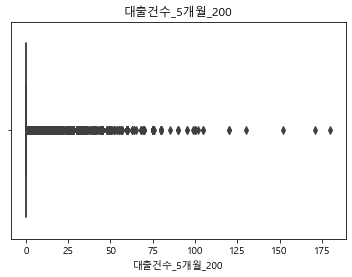

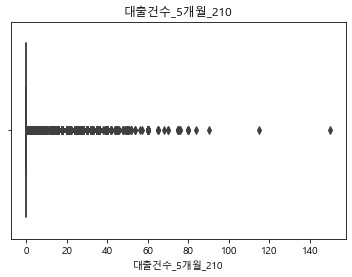

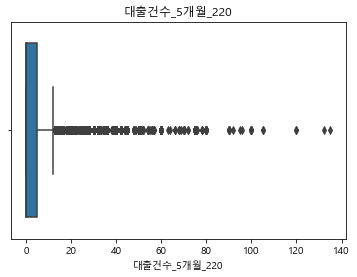

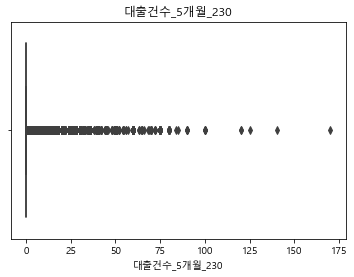

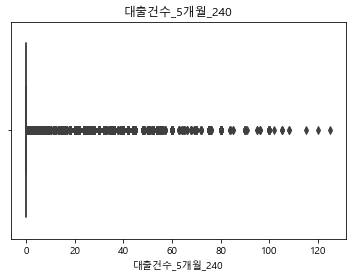

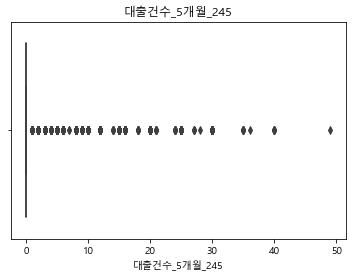

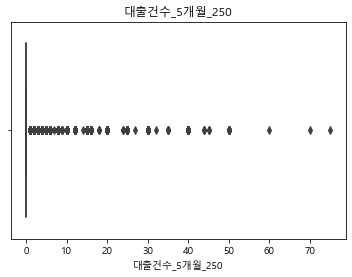

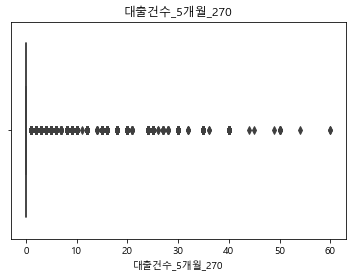

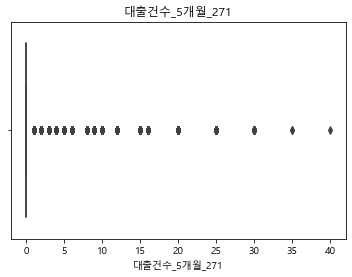

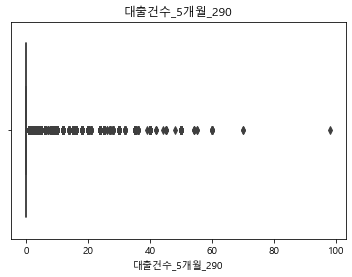

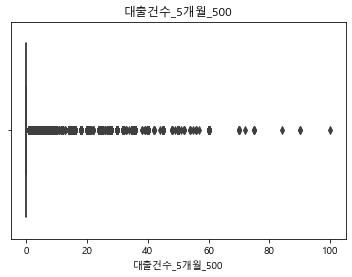

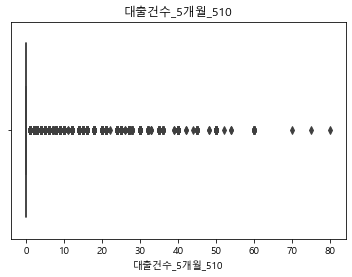

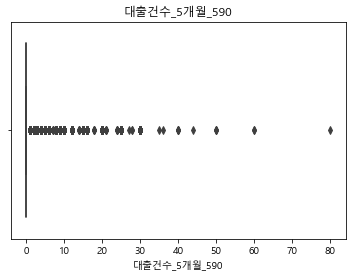

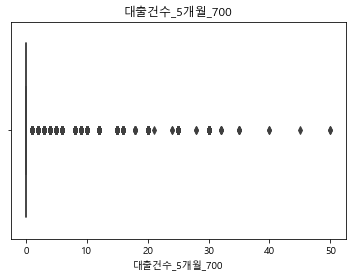

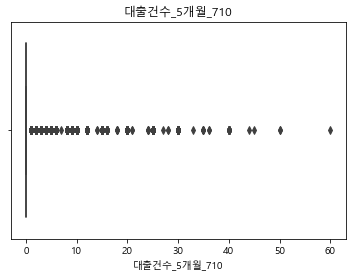

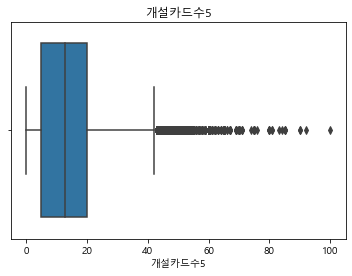

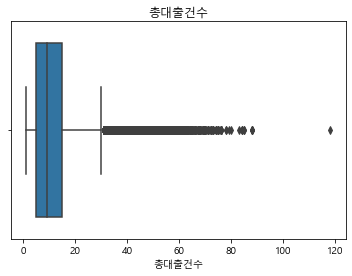

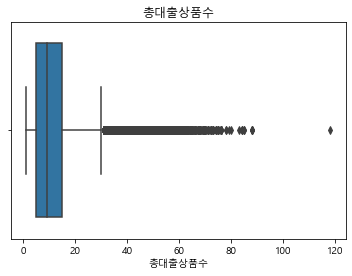

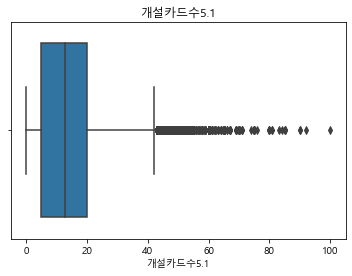

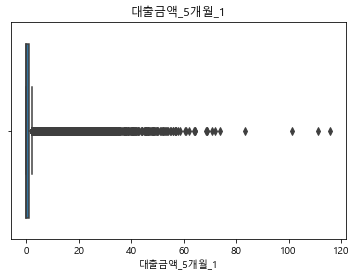

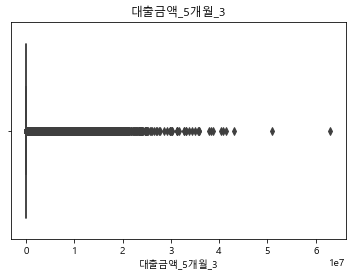

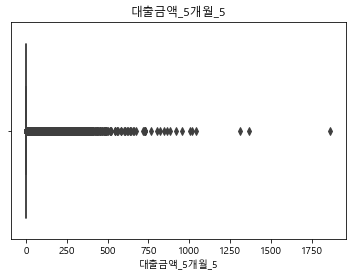

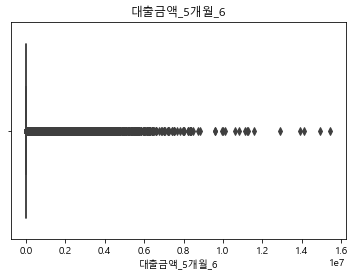

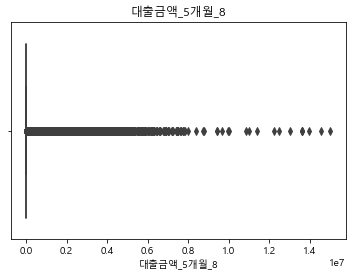

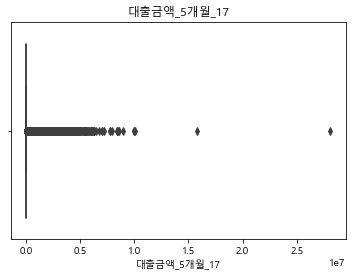

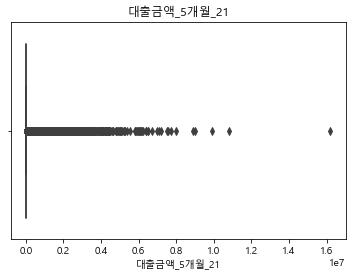

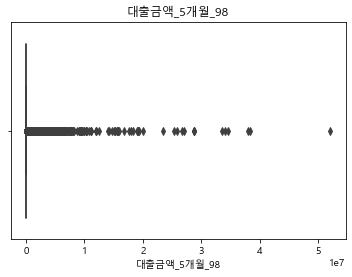

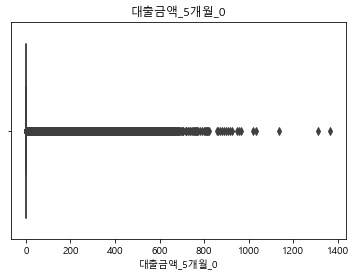

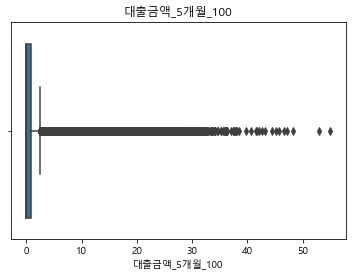

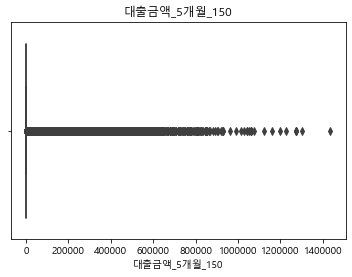

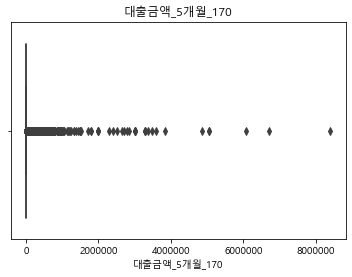

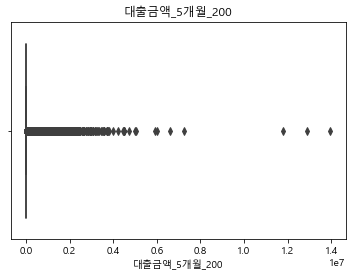

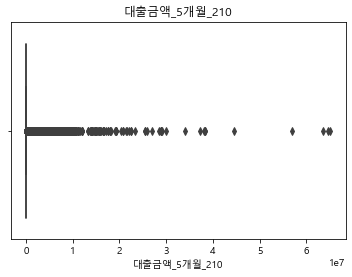

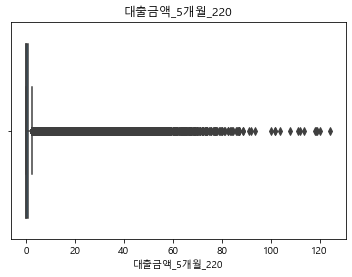

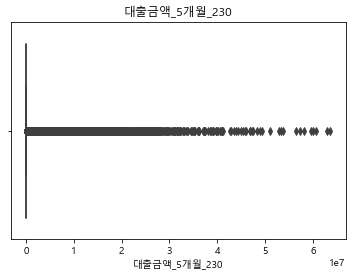

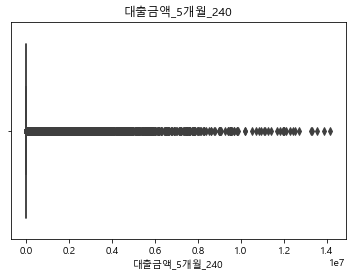

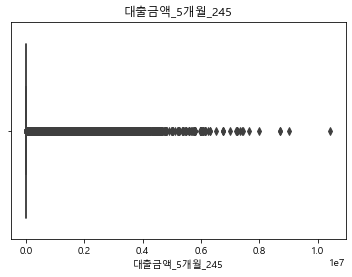

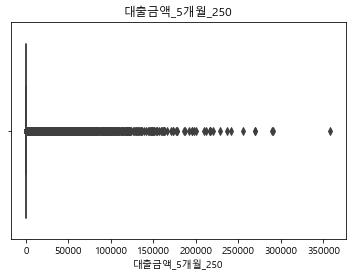

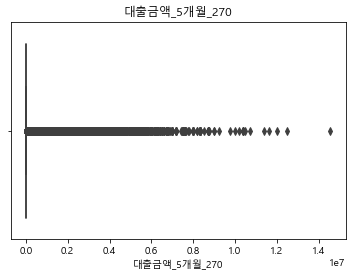

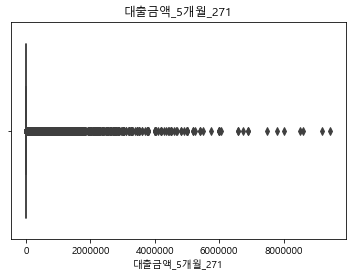

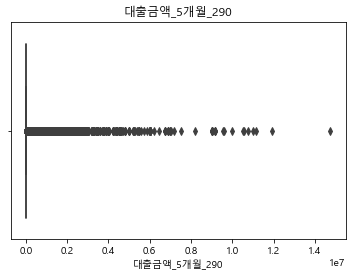

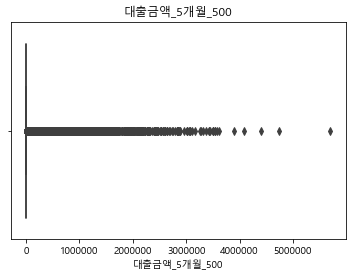

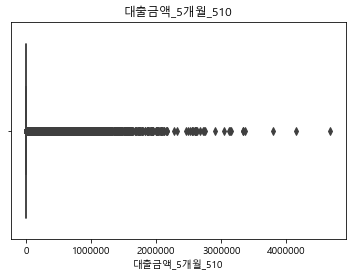

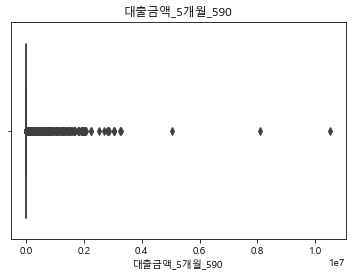

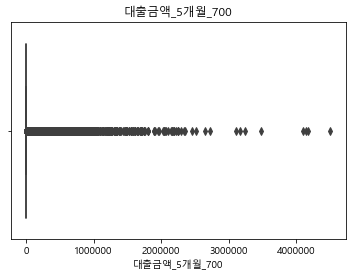

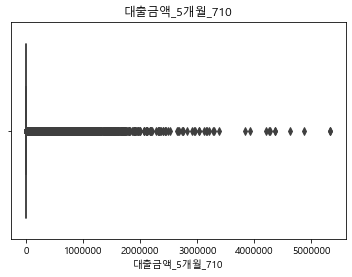

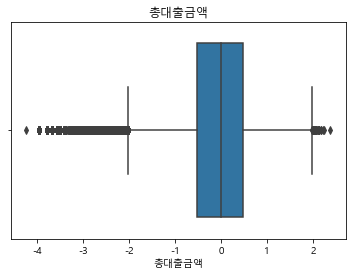

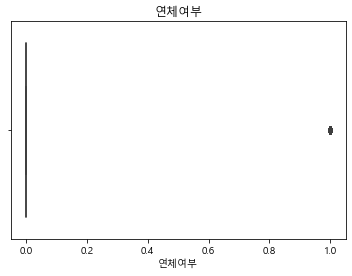

In [7]:
for i in range(1,len(df_m.columns)):
    try:
        ax = sns.boxplot(x=df_m.columns[i], hue='연체여부', data=df_m)
        plt.title(df_m.columns[i])
        fig = ax.get_figure()
        plt.show()
        #ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/boxplot/'+df_m.columns[i]+'.png')
    
    except Exception as e:
        print('예외발생')

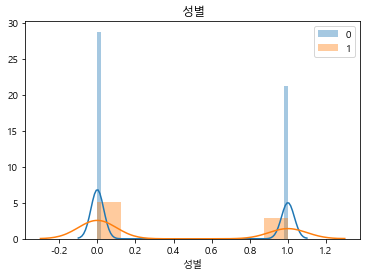

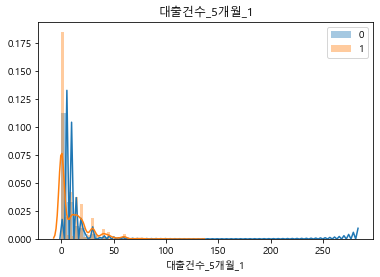

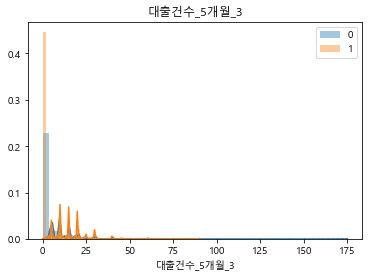

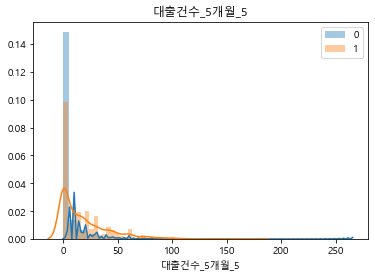

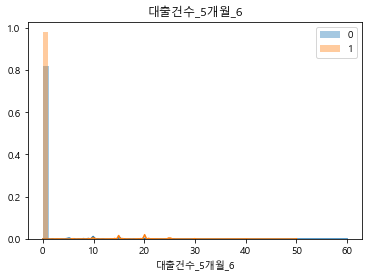

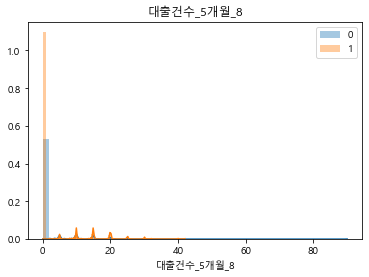

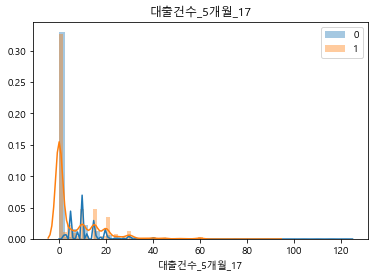

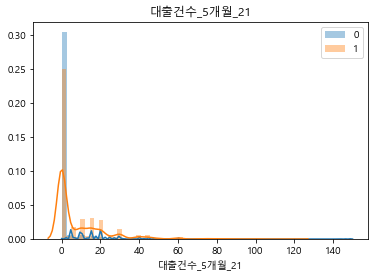

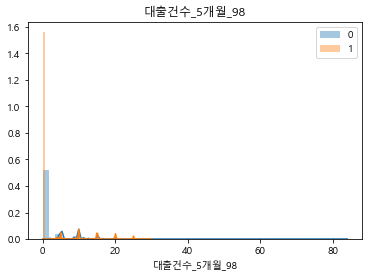

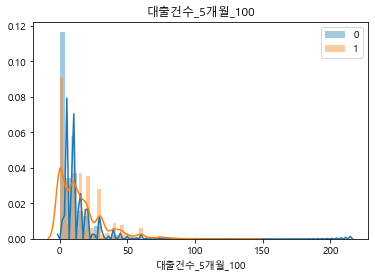

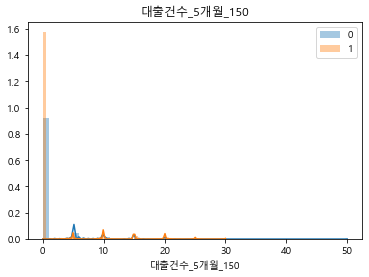

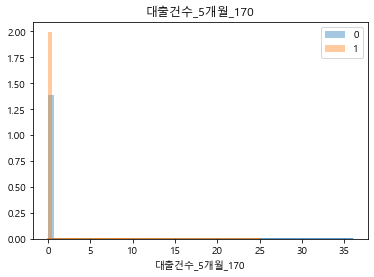

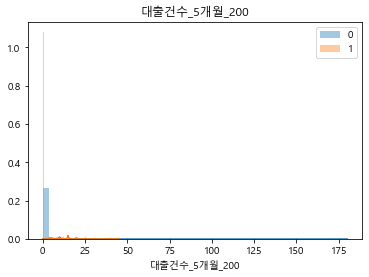

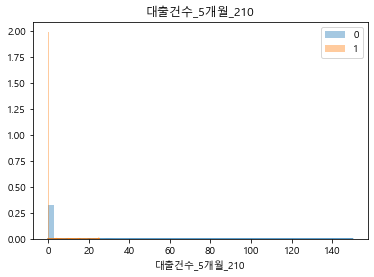

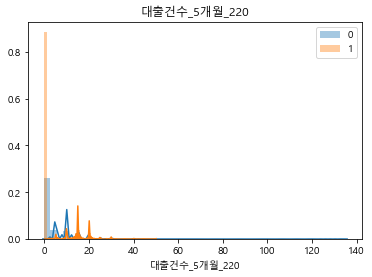

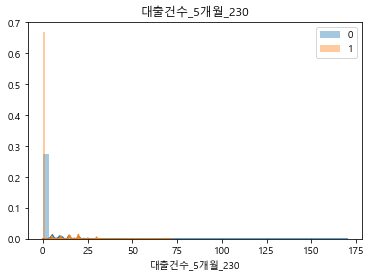

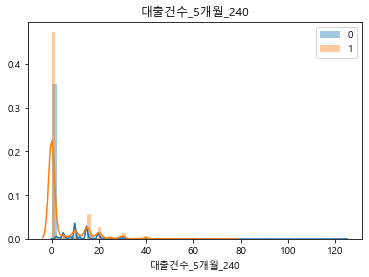

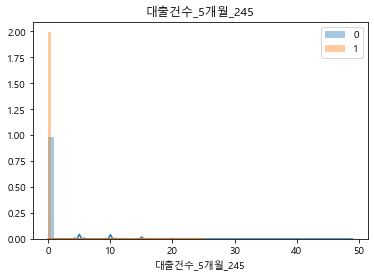

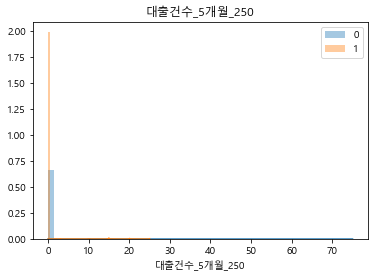

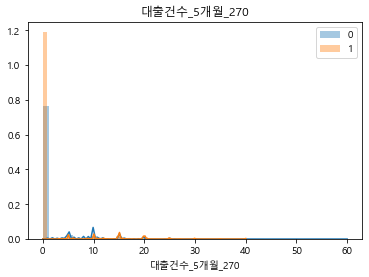

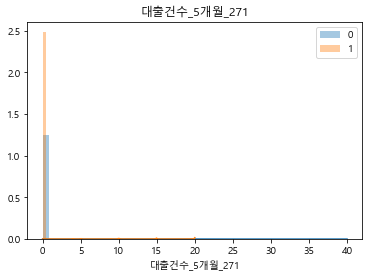

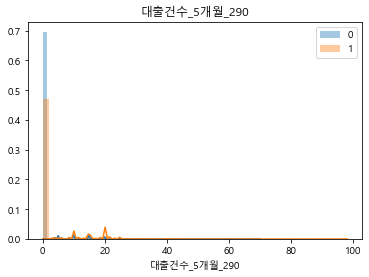

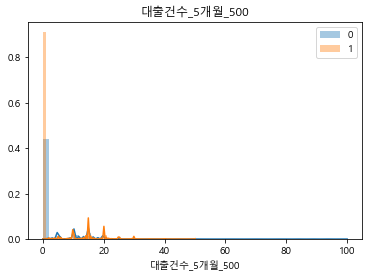

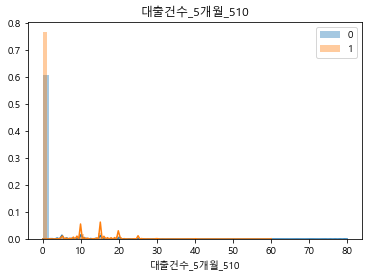

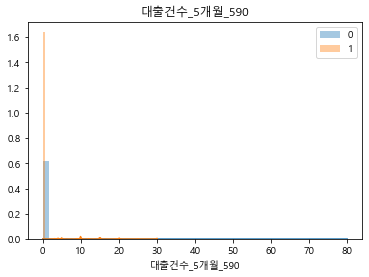

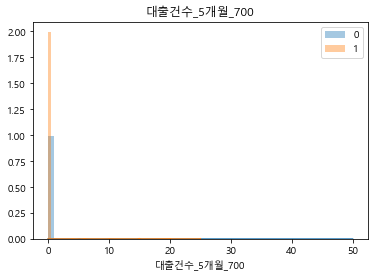

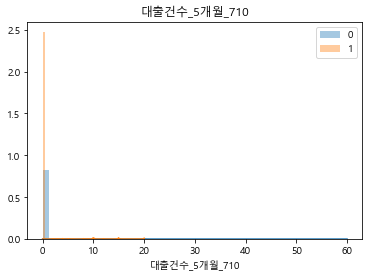

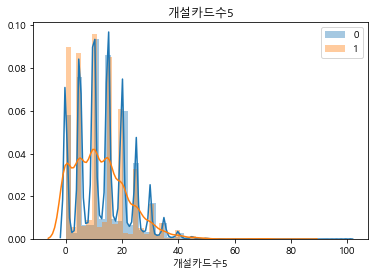

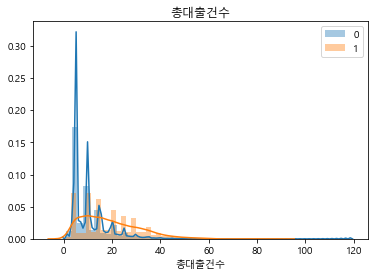

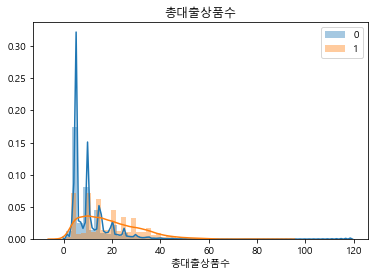

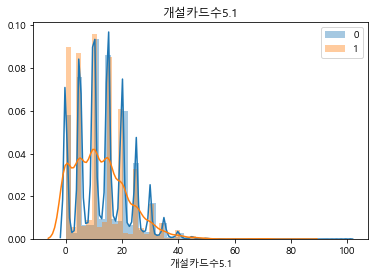

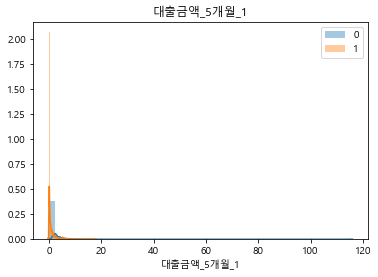

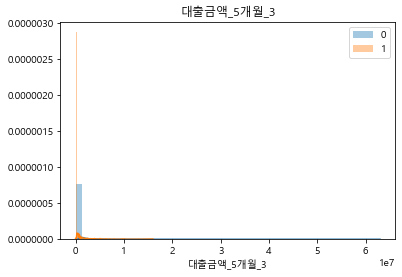

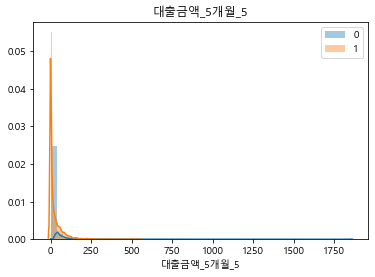

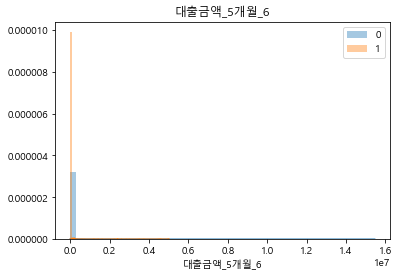

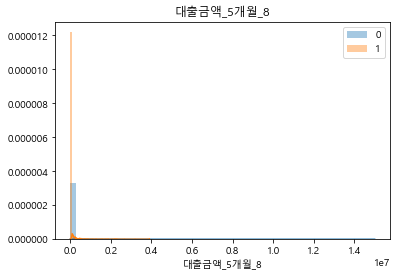

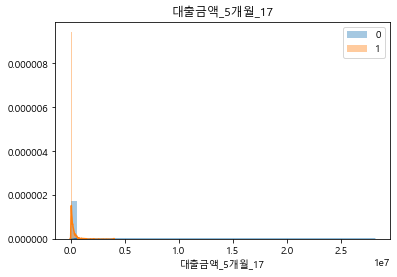

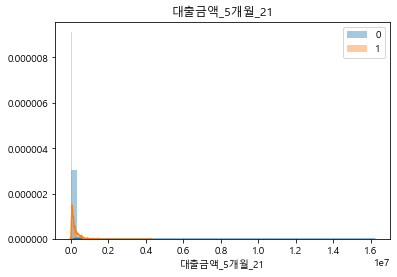

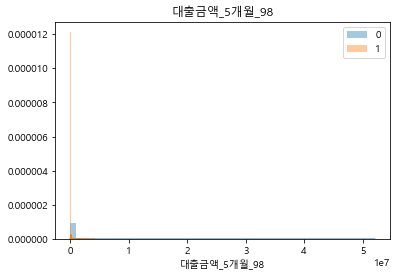

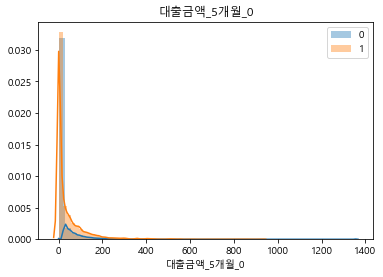

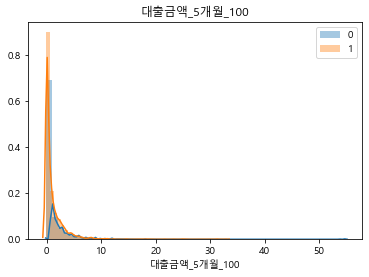

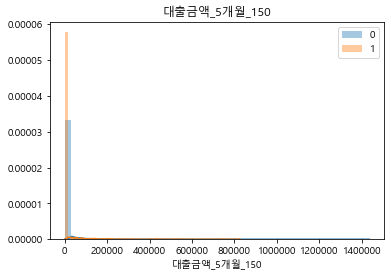

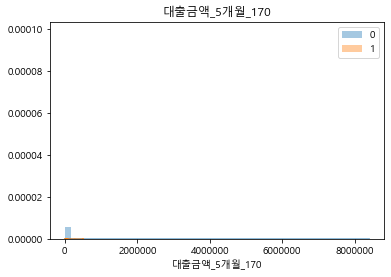

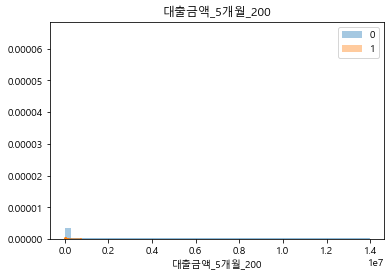

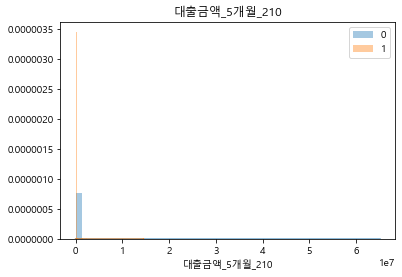

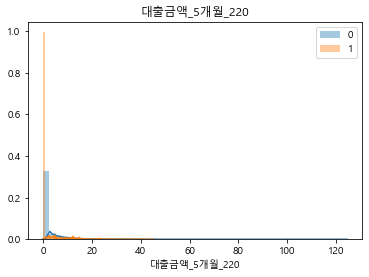

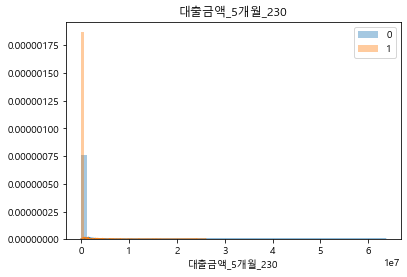

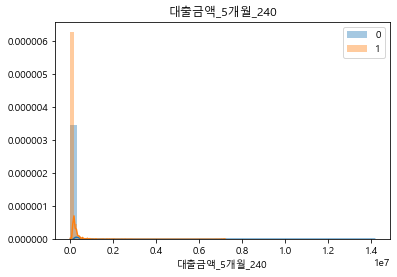

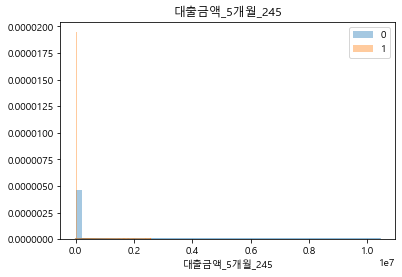

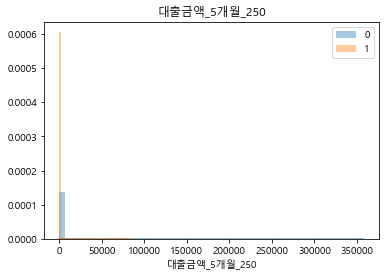

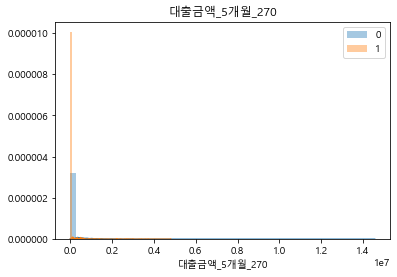

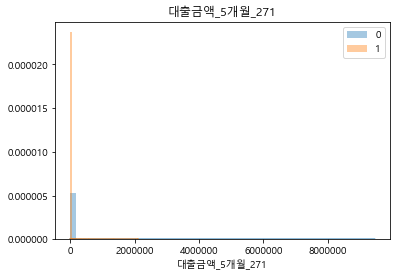

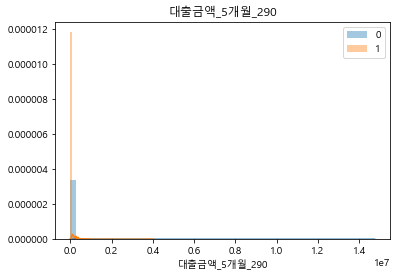

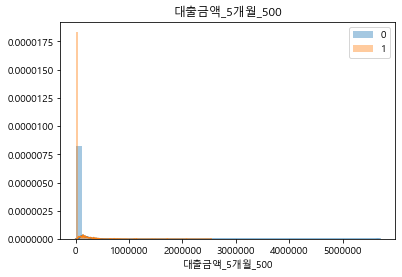

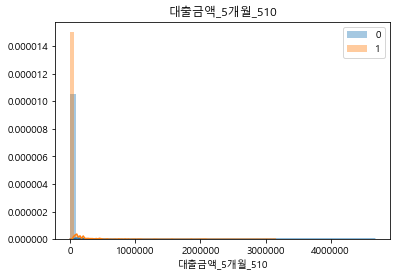

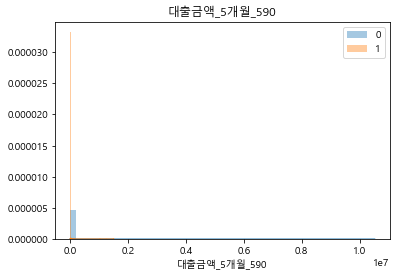

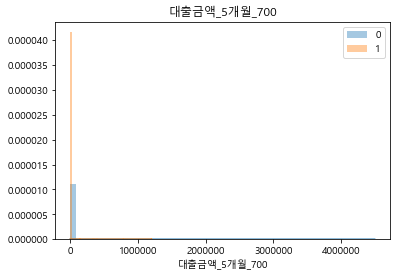

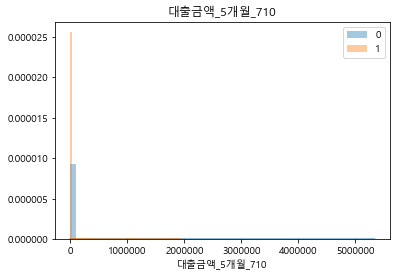

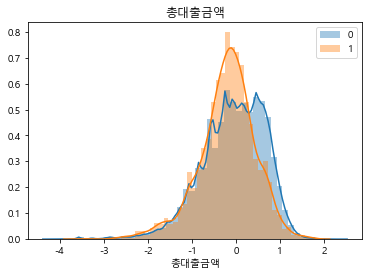

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


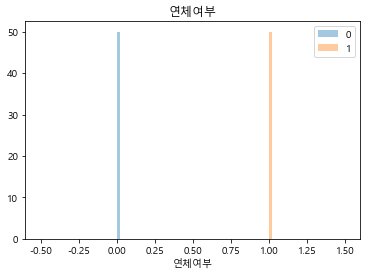

In [8]:
for i in range(1,len(df_m.columns)):
    try:
        g = sns.distplot(df_m.loc[df_m['연체여부'] == 0][df_m.columns[i]], label= 0)
        g = sns.distplot(df_m.loc[df_m['연체여부'] == 1][df_m.columns[i]], label= 1)
        g.legend(loc=1)
        fig = ax.get_figure()
        plt.title(df_m.columns[i])
        plt.show()
        #g.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/distribution/'+df_m.columns[i]+'.png')
        
    except Exception as e:
        print("예외발생")

In [9]:
x = df.drop(columns=['연체여부'])

In [10]:
y = df['연체여부']

In [11]:
len(x.columns)

60

In [12]:
from sklearn.decomposition import PCA

## 1. 10개의 주성분

In [13]:
pca = PCA(n_components=10)
pca_componentes = pca.fit_transform(x)
pca_df = pd.DataFrame(data=pca_componentes)

In [13]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-204850.823301,52770.958521,-51743.899640,-74094.165915,21946.601872,-23300.910746,23727.231671,-30247.424655,-23103.043584,7408.619356
1,405653.596448,-815190.314784,-72709.247509,-90350.879491,-9774.509608,-26803.618500,-97785.375394,9020.940275,29321.471178,-28361.754491
2,-206097.271257,56087.951338,-46743.977165,-74829.805830,22286.637356,-25915.054515,-15540.751350,-25132.762502,-20575.291035,2169.965723
3,-206110.538095,56100.026729,-52058.258259,-75115.582631,22935.645052,-25833.536895,-15445.108723,-24569.240674,-20111.362148,6878.747565
4,-198057.263578,36578.193140,549811.023701,-30953.314357,354887.688067,-42251.653565,-20923.867161,-77387.953221,-45056.072006,-90459.010408


In [14]:
pca.explained_variance_ratio_

array([0.6571778 , 0.08785828, 0.0678797 , 0.06207163, 0.03383588,
       0.01944202, 0.01656103, 0.01391278, 0.01220081, 0.00744679])

10개의 주성분이 약 97%를 설명

In [15]:
sum(pca.explained_variance_ratio_)

0.9783866946616505

# 2. 15개

In [14]:
pca = PCA(n_components=15)
pca_componentes = pca.fit_transform(x)
pca_df = pd.DataFrame(data=pca_componentes)

In [15]:
pca.explained_variance_ratio_

array([0.6571778 , 0.08785828, 0.0678797 , 0.06207163, 0.03383588,
       0.01944202, 0.01656103, 0.01391278, 0.01220081, 0.00744679,
       0.00671348, 0.00462555, 0.002851  , 0.00255846, 0.00179217])

In [16]:
sum(pca.explained_variance_ratio_)

0.9969273531644984

In [17]:
df = pd.concat([pca_df,y],axis=1)
df.head()
df.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/data/PCA15.csv',encoding='cp949')

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,연체여부
0,-204850.823301,52770.958523,-51743.899640,-74094.165914,21946.601873,-23300.910750,23727.231648,-30247.424622,-23103.043492,7408.619201,-11950.475089,-3.860570e+02,6550.545997,-1809.734301,12354.731227,0
1,405653.596448,-815190.314784,-72709.247509,-90350.879491,-9774.509604,-26803.618517,-97785.375495,9020.940422,29321.471578,-28361.755172,108151.816637,1.020552e+06,-27163.089763,-6517.407193,-15006.637588,0
2,-206097.271257,56087.951338,-46743.977164,-74829.805830,22286.637357,-25915.054517,-15540.751364,-25132.762481,-20575.290977,2169.965626,-9793.306133,-7.871127e+02,6383.290913,-2101.591123,-3581.171104,0
3,-206110.538095,56100.026729,-52058.258259,-75115.582631,22935.645051,-25833.536900,-15445.108749,-24569.240638,-20111.362046,6878.747374,-10112.348762,-6.988443e+02,6155.257523,-2069.970026,-3615.590459,0
4,-198057.263578,36578.193140,549811.023701,-30953.314357,354887.688069,-42251.653571,-20923.867196,-77387.953171,-45056.071870,-90459.010644,-11004.365082,4.307013e+02,4776.089862,-2402.400472,-6734.460541,0


## 20개

In [19]:
pca = PCA(n_components=20)
pca_componentes = pca.fit_transform(x)
pca_df = pd.DataFrame(data=pca_componentes)

In [20]:
pca.explained_variance_ratio_

array([6.57177795e-01, 8.78582847e-02, 6.78796959e-02, 6.20716267e-02,
       3.38358789e-02, 1.94420150e-02, 1.65610304e-02, 1.39127754e-02,
       1.22008069e-02, 7.44678530e-03, 6.71348237e-03, 4.62555135e-03,
       2.85099570e-03, 2.55845913e-03, 1.79216995e-03, 9.89051869e-04,
       7.54109113e-04, 4.53855733e-04, 3.57941570e-04, 2.65708155e-04])

In [21]:
sum(pca.explained_variance_ratio_)

0.9997480196051564

In [22]:
df = pd.concat([pca_df,y],axis=1)
df.head()
df.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/data/PCA20.csv',encoding='cp949')

In [23]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,연체여부
0,-204850.823301,52770.958516,-51743.899640,-74094.165915,21946.601873,-23300.910750,23727.231648,-30247.424622,-23103.043492,7408.619201,-11950.475089,-3.860570e+02,6550.545997,-1809.734301,12354.731227,-1765.532661,-913.911872,-4753.597451,-311.099729,158.886472,0
1,405653.596448,-815190.314784,-72709.247509,-90350.879491,-9774.509604,-26803.618517,-97785.375495,9020.940422,29321.471578,-28361.755172,108151.816637,1.020552e+06,-27163.089763,-6517.407193,-15006.637588,-4371.368554,6926.029619,-4166.695116,2801.330245,-423.510043,0
2,-206097.271257,56087.951338,-46743.977165,-74829.805830,22286.637360,-25915.054518,-15540.751364,-25132.762481,-20575.290977,2169.965626,-9793.306133,-7.871127e+02,6383.290913,-2101.591123,-3581.171104,-1762.940467,-798.431139,2178.362419,-123.843038,194.559392,0
3,-206110.538095,56100.026729,-52058.258259,-75115.582631,22935.645053,-25833.536899,-15445.108749,-24569.240636,-20111.362045,6878.747391,-10112.348763,-6.988443e+02,6155.257522,-2069.970026,-3615.590459,-1741.241630,-705.335974,-4630.200105,-115.199222,166.597363,0
4,-198057.263578,36578.193140,549811.023701,-30953.314357,354887.688069,-42251.653570,-20923.867195,-77387.953171,-45056.071869,-90459.010638,-11004.365083,4.307013e+02,4776.089862,-2402.400472,-6734.460541,-483.816583,636.169400,-10300.849642,-744.715971,-356.222427,0


## 25개

In [24]:
pca = PCA(n_components=25)
pca_componentes = pca.fit_transform(x)
pca_df = pd.DataFrame(data=pca_componentes)

In [25]:
pca.explained_variance_ratio_

array([6.57177795e-01, 8.78582847e-02, 6.78796959e-02, 6.20716267e-02,
       3.38358789e-02, 1.94420150e-02, 1.65610304e-02, 1.39127754e-02,
       1.22008069e-02, 7.44678530e-03, 6.71348237e-03, 4.62555135e-03,
       2.85099570e-03, 2.55845913e-03, 1.79216995e-03, 9.89051869e-04,
       7.54109113e-04, 4.53855733e-04, 3.57941570e-04, 2.65708155e-04,
       2.48914975e-04, 3.06410705e-06, 9.38869439e-10, 1.02560955e-10,
       6.75533035e-11])

In [26]:
sum(pca.explained_variance_ratio_)

0.9999999997961992

In [27]:
df = pd.concat([pca_df,y],axis=1)
df.head()
df.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/data/PCA25.csv',encoding='cp949')

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,연체여부
0,-204850.823301,52770.958507,-51743.899640,-74094.165915,21946.601873,-23300.910750,23727.231647,-30247.424622,-23103.043492,7408.619201,-11950.475089,-3.860570e+02,6550.545997,-1809.734301,12354.731226,-1765.532661,-913.911872,-4753.597451,-311.099729,158.886472,-252.534625,-33.835924,112.532205,-8.806350,-0.329643,0
1,405653.596448,-815190.314786,-72709.247512,-90350.879489,-9774.509604,-26803.618517,-97785.375495,9020.940422,29321.471578,-28361.755175,108151.816637,1.020552e+06,-27163.089762,-6517.407193,-15006.637588,-4371.368554,6926.029619,-4166.695116,2801.330245,-423.510043,-880.516795,-72.552842,23.117528,-14.270060,5.922888,0
2,-206097.271257,56087.951339,-46743.977165,-74829.805830,22286.637357,-25915.054517,-15540.751364,-25132.762482,-20575.290977,2169.965625,-9793.306133,-7.871127e+02,6383.290913,-2101.591123,-3581.171104,-1762.940467,-798.431139,2178.362419,-123.843038,194.559392,-210.008613,-90.218719,-14.905291,15.638945,-10.855488,0
3,-206110.538095,56100.026730,-52058.258258,-75115.582631,22935.645053,-25833.536899,-15445.108749,-24569.240636,-20111.362045,6878.747391,-10112.348763,-6.988443e+02,6155.257522,-2069.970026,-3615.590459,-1741.241630,-705.335974,-4630.200105,-115.199222,166.597363,-211.383874,-29.039764,-12.282440,-3.675727,10.275425,0
4,-198057.263578,36578.193140,549811.023701,-30953.314357,354887.688069,-42251.653571,-20923.867196,-77387.953170,-45056.071869,-90459.010641,-11004.365083,4.307013e+02,4776.089862,-2402.400472,-6734.460541,-483.816583,636.169400,-10300.849642,-744.715971,-356.222427,-1024.813823,-14.739048,-11.505845,-11.296444,8.830318,0


## 30개

In [25]:
pca = PCA(n_components=30)
pca_componentes = pca.fit_transform(x)
pca_df = pd.DataFrame(data=pca_componentes)

In [26]:
pca.explained_variance_ratio_

array([6.57177795e-01, 8.78582847e-02, 6.78796959e-02, 6.20716267e-02,
       3.38358789e-02, 1.94420150e-02, 1.65610304e-02, 1.39127754e-02,
       1.22008069e-02, 7.44678530e-03, 6.71348237e-03, 4.62555135e-03,
       2.85099570e-03, 2.55845913e-03, 1.79216995e-03, 9.89051869e-04,
       7.54109113e-04, 4.53855733e-04, 3.57941570e-04, 2.65708155e-04,
       2.48914975e-04, 3.06410705e-06, 9.38869439e-10, 1.02560955e-10,
       6.75533035e-11, 6.31626975e-11, 3.27242003e-11, 2.13817517e-11,
       1.70116231e-11, 1.16150803e-11])

In [27]:
sum(pca.explained_variance_ratio_)

0.9999999999420975

In [31]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-204850.823301,52770.958514,-51743.899640,-74094.165915,21946.601873,-23300.910750,23727.231647,-30247.424622,-23103.043492,7408.619201,-11950.475089,-3.860570e+02,6550.545997,-1809.734301,12354.731227,-1765.532661,-913.911872,-4753.597451,-311.099729,158.886472,-252.534625,-33.835924,112.532205,-8.806348,-0.329644,-33.055148,11.179222,-3.672021,14.883649,-9.091747
1,405653.596448,-815190.314784,-72709.247509,-90350.879491,-9774.509604,-26803.618517,-97785.375494,9020.940422,29321.471578,-28361.755173,108151.816637,1.020552e+06,-27163.089763,-6517.407193,-15006.637588,-4371.368554,6926.029619,-4166.695116,2801.330245,-423.510043,-880.516795,-72.552842,23.117528,-14.270063,5.922864,7.501598,-12.392604,1.676508,2.323156,2.320190
2,-206097.271257,56087.951338,-46743.977165,-74829.805830,22286.637358,-25915.054517,-15540.751364,-25132.762481,-20575.290977,2169.965625,-9793.306133,-7.871127e+02,6383.290913,-2101.591123,-3581.171104,-1762.940467,-798.431139,2178.362419,-123.843038,194.559392,-210.008613,-90.218719,-14.905291,15.638953,-10.855479,-2.041852,0.430097,1.146049,0.480500,0.148661
3,-206110.538095,56100.026729,-52058.258259,-75115.582631,22935.645054,-25833.536899,-15445.108749,-24569.240636,-20111.362045,6878.747390,-10112.348763,-6.988443e+02,6155.257522,-2069.970026,-3615.590459,-1741.241630,-705.335974,-4630.200105,-115.199222,166.597363,-211.383874,-29.039764,-12.282440,-3.675728,10.275420,0.566608,0.399041,-2.340568,3.386706,1.090823
4,-198057.263578,36578.193140,549811.023701,-30953.314357,354887.688069,-42251.653571,-20923.867196,-77387.953171,-45056.071869,-90459.010641,-11004.365083,4.307013e+02,4776.089862,-2402.400472,-6734.460541,-483.816583,636.169400,-10300.849642,-744.715971,-356.222427,-1024.813823,-14.739048,-11.505845,-11.296433,8.830334,-0.072237,0.896735,-3.269015,4.676838,2.052040


In [32]:
df = pd.concat([pca_df,y],axis=1)

In [33]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,연체여부
0,-204850.823301,52770.958514,-51743.899640,-74094.165915,21946.601873,-23300.910750,23727.231647,-30247.424622,-23103.043492,7408.619201,-11950.475089,-3.860570e+02,6550.545997,-1809.734301,12354.731227,-1765.532661,-913.911872,-4753.597451,-311.099729,158.886472,-252.534625,-33.835924,112.532205,-8.806348,-0.329644,-33.055148,11.179222,-3.672021,14.883649,-9.091747,0
1,405653.596448,-815190.314784,-72709.247509,-90350.879491,-9774.509604,-26803.618517,-97785.375494,9020.940422,29321.471578,-28361.755173,108151.816637,1.020552e+06,-27163.089763,-6517.407193,-15006.637588,-4371.368554,6926.029619,-4166.695116,2801.330245,-423.510043,-880.516795,-72.552842,23.117528,-14.270063,5.922864,7.501598,-12.392604,1.676508,2.323156,2.320190,0
2,-206097.271257,56087.951338,-46743.977165,-74829.805830,22286.637358,-25915.054517,-15540.751364,-25132.762481,-20575.290977,2169.965625,-9793.306133,-7.871127e+02,6383.290913,-2101.591123,-3581.171104,-1762.940467,-798.431139,2178.362419,-123.843038,194.559392,-210.008613,-90.218719,-14.905291,15.638953,-10.855479,-2.041852,0.430097,1.146049,0.480500,0.148661,0
3,-206110.538095,56100.026729,-52058.258259,-75115.582631,22935.645054,-25833.536899,-15445.108749,-24569.240636,-20111.362045,6878.747390,-10112.348763,-6.988443e+02,6155.257522,-2069.970026,-3615.590459,-1741.241630,-705.335974,-4630.200105,-115.199222,166.597363,-211.383874,-29.039764,-12.282440,-3.675728,10.275420,0.566608,0.399041,-2.340568,3.386706,1.090823,0
4,-198057.263578,36578.193140,549811.023701,-30953.314357,354887.688069,-42251.653571,-20923.867196,-77387.953171,-45056.071869,-90459.010641,-11004.365083,4.307013e+02,4776.089862,-2402.400472,-6734.460541,-483.816583,636.169400,-10300.849642,-744.715971,-356.222427,-1024.813823,-14.739048,-11.505845,-11.296433,8.830334,-0.072237,0.896735,-3.269015,4.676838,2.052040,0


해당 데이터는 정규화(log) + RobustScaling + PCA한 결과임

In [34]:
df.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/시나리오3/data/PCA30.csv',encoding='cp949')